Минимальное значение на траектории = -401.0
Максимальное значение на траектории = 99.0
Значение индекса, начиная с которого будет сделано свыше 10 шагов в одну сторону, равно 1
Значение индекса, с которого будет сделано максимальное количество шагов в одну сторону, равно 500


Text(0, 0.5, 'накопленные значения трактории')

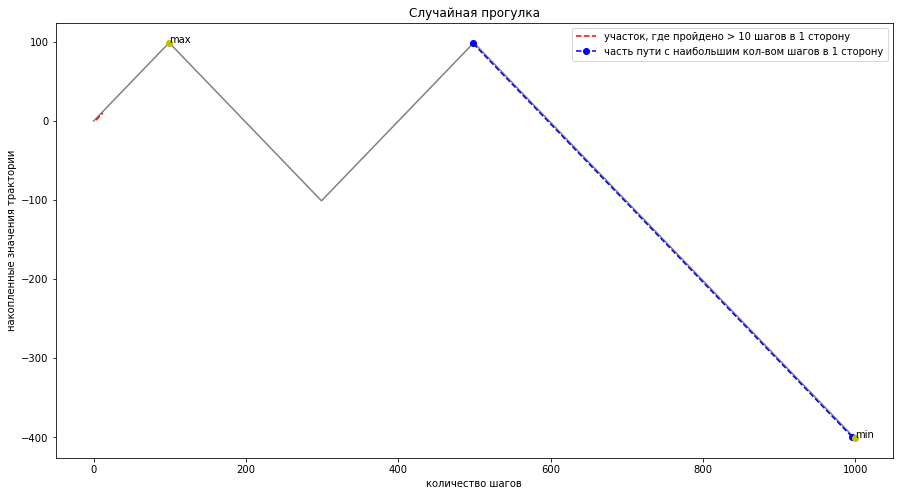

In [23]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
a = np.random.choice([-1,1], size=1000, replace=True)

### зачем ниже этот треш?

b = list(a)
s = 0
k = list([0]) 


for i in range(0,999):
    s = s + b[i]
    k.append(s)

### что мешало сделать так
### a[0] = 0
### k =  np.cumsum(a)  
    
my_list = np.zeros(1000)
my_list[1:100] = 1
my_list[100:300] = -1
my_list[300:500] = 1
my_list[500:1000] = -1

mu_list_cum = np.cumsum(my_list)


b = list(my_list)
k = list(mu_list_cum)

min = np.min(k)
max = np.max(k)
print("Минимальное значение на траектории =", min)
print("Максимальное значение на траектории =", max)
d = 0
for i in range(0,999):
    if b[i] == b[i+1]:
        d = d+1
    else: d = 0
    if d == 10: 
        break
if d == 10:
    p = i-9
    print("Значение индекса, начиная с которого будет сделано свыше 10 шагов в одну сторону, равно", p)
else: print("Свыше 10 шагов в одну сторону не сделано")
f = 0
g = 0
for i in range(0,999):
    if b[i] == b[i+1]:
        f = f+1
    else: f = 0
    if f > g:
        g = f
        h = i - g + 1
print("Значение индекса, с которого будет сделано максимальное количество шагов в одну сторону, равно", h)
plt.figure(figsize=(15,8))
plt.plot(k, 'gray')
plt.title("Случайная прогулка")
if g >= 10:
    plt.plot([p+2,p+9+2],[k[p],k[p+9]],'r--', label = "участок, где пройдено > 10 шагов в 1 сторону")
plt.plot([h-2,h+g-1-2],[k[h],k[h+g-1]], 'bo--', label = "часть пути с наибольшим кол-вом шагов в 1 сторону")
plt.annotate("min",(k.index(min), min))
plt.plot(k.index(min), min, 'yo')
plt.annotate("max",(k.index(max), max))
plt.plot(k.index(max), max, 'yo')
plt.legend()
plt.xlabel('количество шагов')
plt.ylabel('накопленные значения трактории')